# Lab 04 - Predicting A Continuous Target With Regression

### Date: 04/06/2020
### Author: Cera Drake
##### Dataset: Titanic -- I will use a data set that looks at different features of the passengers on the Titanic
##### Objective: In this lab, I will predict a continuous numeric factor. I will be predicting fare using information from the Titanic dataset

In [83]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### Section 1: Import and Inspect Data

In [84]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Section 2: Data Exploration and Preparation

In [85]:
# Impute the missing age values using the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)
# Drop rows that are missing fare
titanic = titanic.dropna(subset=['fare'])
# Create numeric variables
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
# Convert 'sex' to a numeric value
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.head()

C:\Users\cerad\AppData\Local\Temp\ipykernel_24704\3774361238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


##### Section 3: Feature Selection and Justification 

In [86]:
# Define features
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. ???
X4 = titanic[['sex']]
y4 = titanic['fare']

##### Reflection: Sex might have an impact on fare because of the gender norms of the time. It might also correlate to class, which would have an effect on fare. Age and family size might also affect fare if there were reduced prices for groups or children. 
##### I am using 3 variables: age, family size, sex
##### Available variables: survived, pclass, sex, age, sibsp, parch, fare, embarked, class,	who, adult_male,deck, embark_town, alive, alone, family_size
##### My case 4 has 1 variable, 'sex'. Sex might be a good indicator of fare due to differences in the gender norms of the time and/or being an indicator of class.

##### Section 4. Train a Regression Model (Linear Regression)

In [87]:
# 4.1 Split the Data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

In [88]:
# Train and Evaluate Linear Regression
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

In [89]:
#Report Performance - Case 1
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))


Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364


In [90]:
#Report Performance - Case 2 
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641


In [91]:
# Report Performance - Case 3
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688


In [92]:
# Report Performance - Case 4
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 4: Training R²: 0.023885614755059348
Case 4: Test R²: 0.09936584220882583
Case 4: Test RMSE: 36.09746477477291
Case 4: Test MAE: 24.24249103567552


###### Compare the train vs test results for each.

###### Did Case 1 overfit or underfit? Explain: Underfit. It did not perform well for the test or training set. Both R^2 numbers are close to 0, which means it might not be a good predictor of a trend. 
###### Did Case 2 overfit or underfit? Explain:Underfit. It performed slightly better than case 1, but still not explaining very much variance in the data. 
###### Did Case 3 overfit or underfit?  Underfit. The training and test scores are very close. The R^2 values are still too low for it to be a strong model. 
###### Did Case 4 overfit or underfit? Explain: Underfit. R^2 scores are still too low for the model to be a good indicator of trends. 

###### Adding age. Did adding age improve the model: Yes. Adding age and family size together improved the model. But, it still did not perform great. However, slightly better than when using 'age' and 'family-size' as individual features. 
###### Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Children could be charged a lower ticket price, so considering the age with the family size might be a better indicator. 

###### Which case performed the worst: Case 1, 'age'
###### How do you know: The R^2 were much closer to 0 than the other cases. Numbers closer to 1 means that the  model performed better. 
###### Do you think adding more training data would improve it (and why/why not): No, I think we need to use better features or a more complex model. The amount of data should be enough. 

###### Which case performed the best: Case 3, we used 'age' and 'family size'
###### How do you know: It had the highest R^2 score. 
###### Do you think adding more training data would improve it (and why/why not): I think there is enough data, but I think adding another feature or switching up the features would improve it. I think it performed the best because it used multiple features.

##### 5.1 Ridge Regression

In [93]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X3_train, y3_train)
y_pred_ridge = ridge_model.predict(X3_test)

##### 5.2 Elastic Net

In [94]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X3_train, y3_train)
y_pred_elastic = elastic_model.predict(X3_test)

##### 5.3 Polynomial Regression 

In [95]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X3_train)
X_test_poly = poly.transform(X3_test)

In [96]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y3_train)
y_pred_poly = poly_model.predict(X_test_poly)

##### 5.4 Visualize Polynomial Cubic Fit (1 Variable)

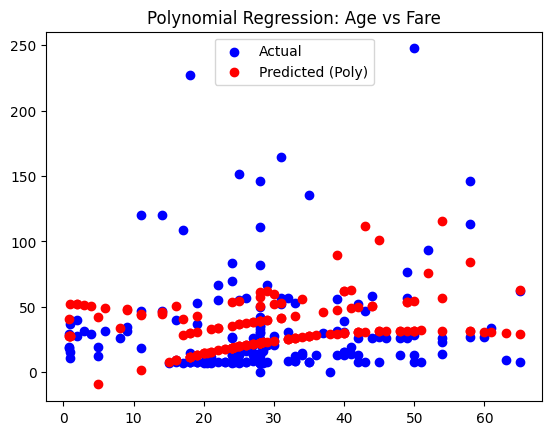

In [97]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

##### What patterns does the cubic model seem to capture:It shows nonlinear trends between age and fare. A slight curve around young/middle age passengers. 
##### Where does it perform well or poorly: It performs well for passengers between 10-40. The dots are a lot more dense and closer together. 
##### Did the polynomial fit outperform linear regression: Slightly better in the middle range of ages
##### Where (on the graph or among which kinds of data points) does it fit best: Mid- range